In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.16.1


In [2]:
dataset_folder = "animal_emotion\Master Folder"
train_folder = f'{dataset_folder}/train'
test_folder = f'{dataset_folder}/test'
valid_folder = f'{dataset_folder}/valid'

classes = ["angry", "happy", "sad"]

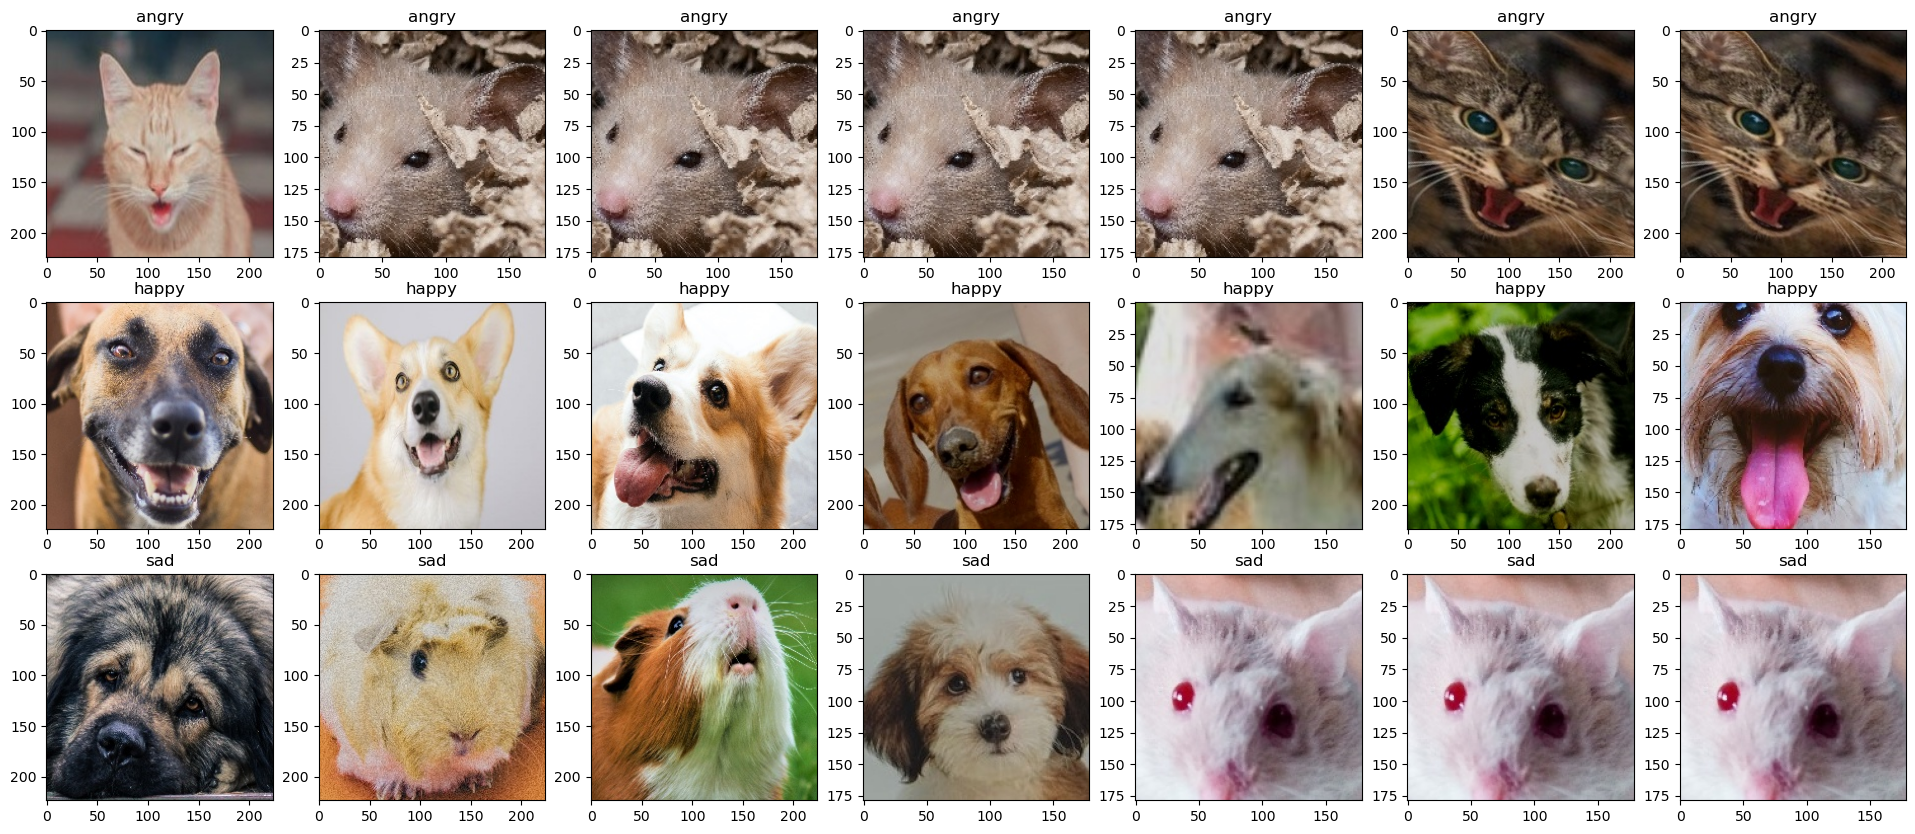

In [3]:
num_images_per_class = 7
fig, ax = plt.subplots(3, num_images_per_class, figsize=(24, 10))
for j in range(3):
    images = os.listdir(f'{train_folder}/{classes[j]}')
    for i in range(num_images_per_class):
        image = plt.imread(f'{train_folder}/{classes[j]}/{images[i]}')
        ax[j, i].set_title(classes[j])
        ax[j, i].imshow(image)

In [4]:
train_batch_size = 64
validation_batch_size = 32
image_size = (224, 224)
datagen_train = ImageDataGenerator(rescale=1./255,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               fill_mode='nearest')
train_generator = datagen_train.flow_from_directory(train_folder,
                                                batch_size=train_batch_size,
                                                target_size= image_size,
                                                class_mode= "sparse",
                                                shuffle = True)
datagen_validation = ImageDataGenerator(rescale=1./255,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               fill_mode='nearest')
validation_generator = datagen_validation.flow_from_directory(test_folder,
                                                batch_size=validation_batch_size,
                                                target_size= image_size,
                                                class_mode= "sparse",
                                                shuffle = True)

Found 7871 images belonging to 4 classes.
Found 1369 images belonging to 4 classes.


In [5]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [6]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [7]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))
    
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)
    
    output = Dense(4,activation = "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    
    model.compile(loss = ['sparse_categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [8]:
model = model_fer((224,224,3))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 25,819,332 (98.49 MB)

 Trainable params: 25,818,372 (98.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [9]:
epochs = 10
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("animal_emotion.weights.h5", monitor ="val_accuracy", save_weights_only = True, mode = "max", verbose =1)
callbacks = (checkpoint,)

In [10]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs, 
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/10


C:\Users\LENOVO\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4475 - loss: 1.4074
Epoch 1: saving model to animal_emotion.weights.h5
122/122 ━━━━━━━━━━━━━━━━━━━━ 641s 5s/step - accuracy: 0.4478 - loss: 1.4058 - val_accuracy: 0.3326 - val_loss: 1.3885
Epoch 2/10
  1/122 ━━━━━━━━━━━━━━━━━━━━ 9:20 5s/step - accuracy: 0.6406 - loss: 0.8398

C:\Users\LENOVO\anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to animal_emotion.weights.h5
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6406 - loss: 0.8398 - val_accuracy: 0.4000 - val_loss: 1.3001
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5940 - loss: 0.9890
Epoch 3: saving model to animal_emotion.weights.h5
122/122 ━━━━━━━━━━━━━━━━━━━━ 636s 5s/step - accuracy: 0.5942 - loss: 0.9886 - val_accuracy: 0.3356 - val_loss: 1.4618
Epoch 4/10
  1/122 ━━━━━━━━━━━━━━━━━━━━ 9:11 5s/step - accuracy: 0.7188 - loss: 0.8196
Epoch 4: saving model to animal_emotion.weights.h5
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7188 - loss: 0.8196 - val_accuracy: 0.5600 - val_loss: 1.0345
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6895 - loss: 0.7943
Epoch 5: saving model to animal_emotion.weights.h5
122/122 ━━━━━━━━━━━━━━━━━━━━ 620s 5s/step - accuracy: 0.6897 - loss: 0.7941 - val_accuracy: 0.3951 - val_loss: 1.6670
Epoch 6/10
  1/122 ━━━━━━━━━━━━━━━━━━━━ 9:32 5s/step - accuracy: 0.7

In [11]:
model.evaluate(validation_generator)

43/43 ━━━━━━━━━━━━━━━━━━━━ 43s 989ms/step - accuracy: 0.5687 - loss: 1.0569


[1.0608506202697754, 0.5799853801727295]

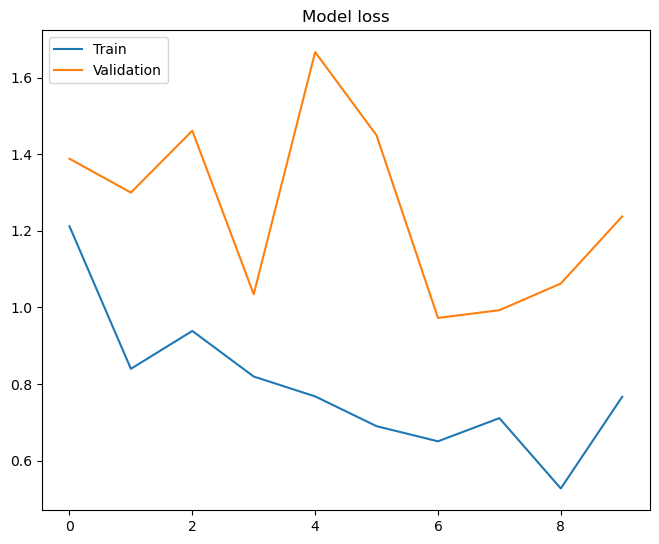

In [12]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.legend(["Train","Validation"],loc = "upper left")
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

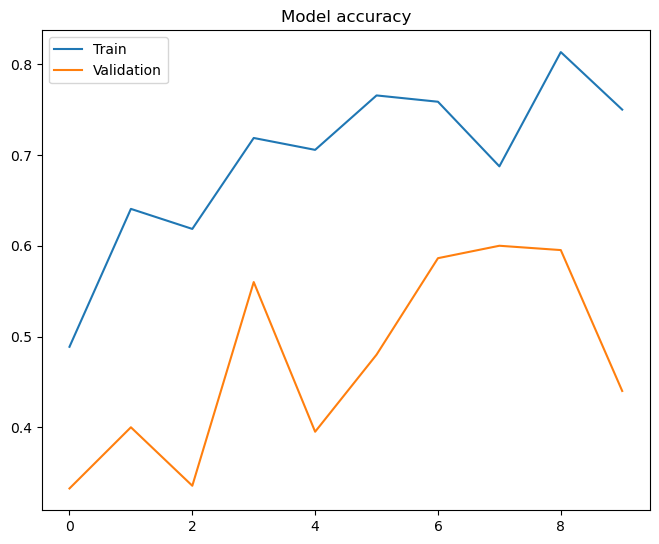

In [13]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.legend(["Train","Validation"],loc = "upper left")
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

In [14]:
model_json = model.to_json()
with open("model_emotion.json","w") as json_file:
    json_file.write(model_json)